In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np

In [5]:
data=pd.read_csv('..\data\\preprocessed_data.csv')

In [6]:
data.head()

,Airline,Source,Destination,Duration,stops,class,depature time,arrival time,Price,Date,Season
0,Iberia,ROM,CMN,580,1,business,Morning,Night,4135.95,2024-03-17,Spring
1,Transavia,ROM,CMN,590,1,economy,Early Morning,Afternoon,2443.35,2024-06-01,Summer
2,Lufthansa,ROM,CMN,570,2,economy,Afternoon,Late Night,2156.70,2024-09-03,Autumn
3,Egypt Air,IST,ROM,640,1,business,Late Night,Afternoon,5561.01,2024-02-10,Winter
4,TAROM,IST,PAR,350,1,business,Morning,Afternoon,8097.18,2024-04-18,Spring


In [7]:
data.dtypes

Airline           object
Source            object
Destination       object
Duration           int64
stops              int64
class             object
depature time     object
arrival time      object
Price            float64
Date              object
Season            object
dtype: object

In [8]:
data.describe()

,Duration,stops,Price
count,4368.000000,4368.000000,4368.000000
mean,424.201007,0.627289,4804.770625
std,311.760060,0.583575,3764.780773
min,115.000000,0.000000,303.030000
25%,185.000000,0.000000,1883.700000
50%,332.500000,1.000000,3816.540000
75%,570.000000,1.000000,6877.552500
max,3225.000000,2.000000,35708.400000


# Data Vizualisation

## Distribution du prix

Text(0, 0.5, 'Fréquence')

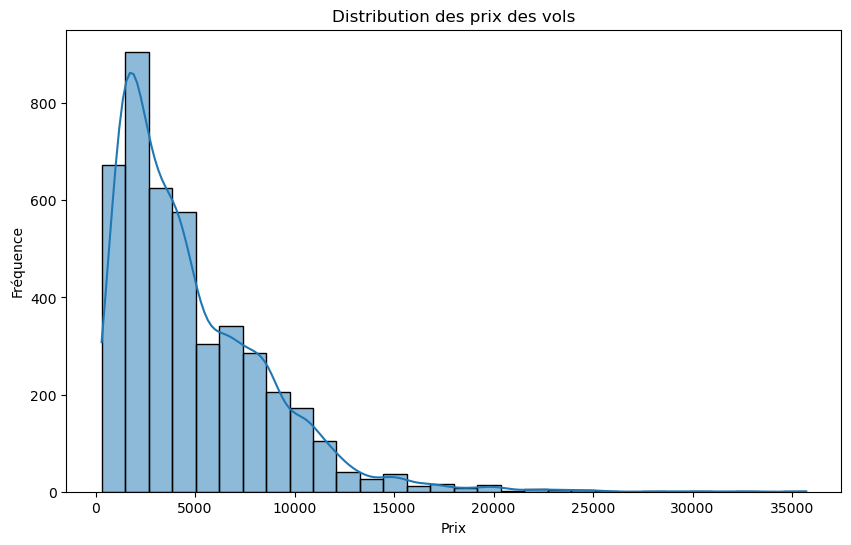

In [12]:

plt.figure(figsize=(10, 6))
sns.histplot(data['Price'],bins=30, kde=True)
plt.title('Distribution des prix des vols')
plt.xlabel('Prix')
plt.ylabel('Fréquence')

## Distribution des vols

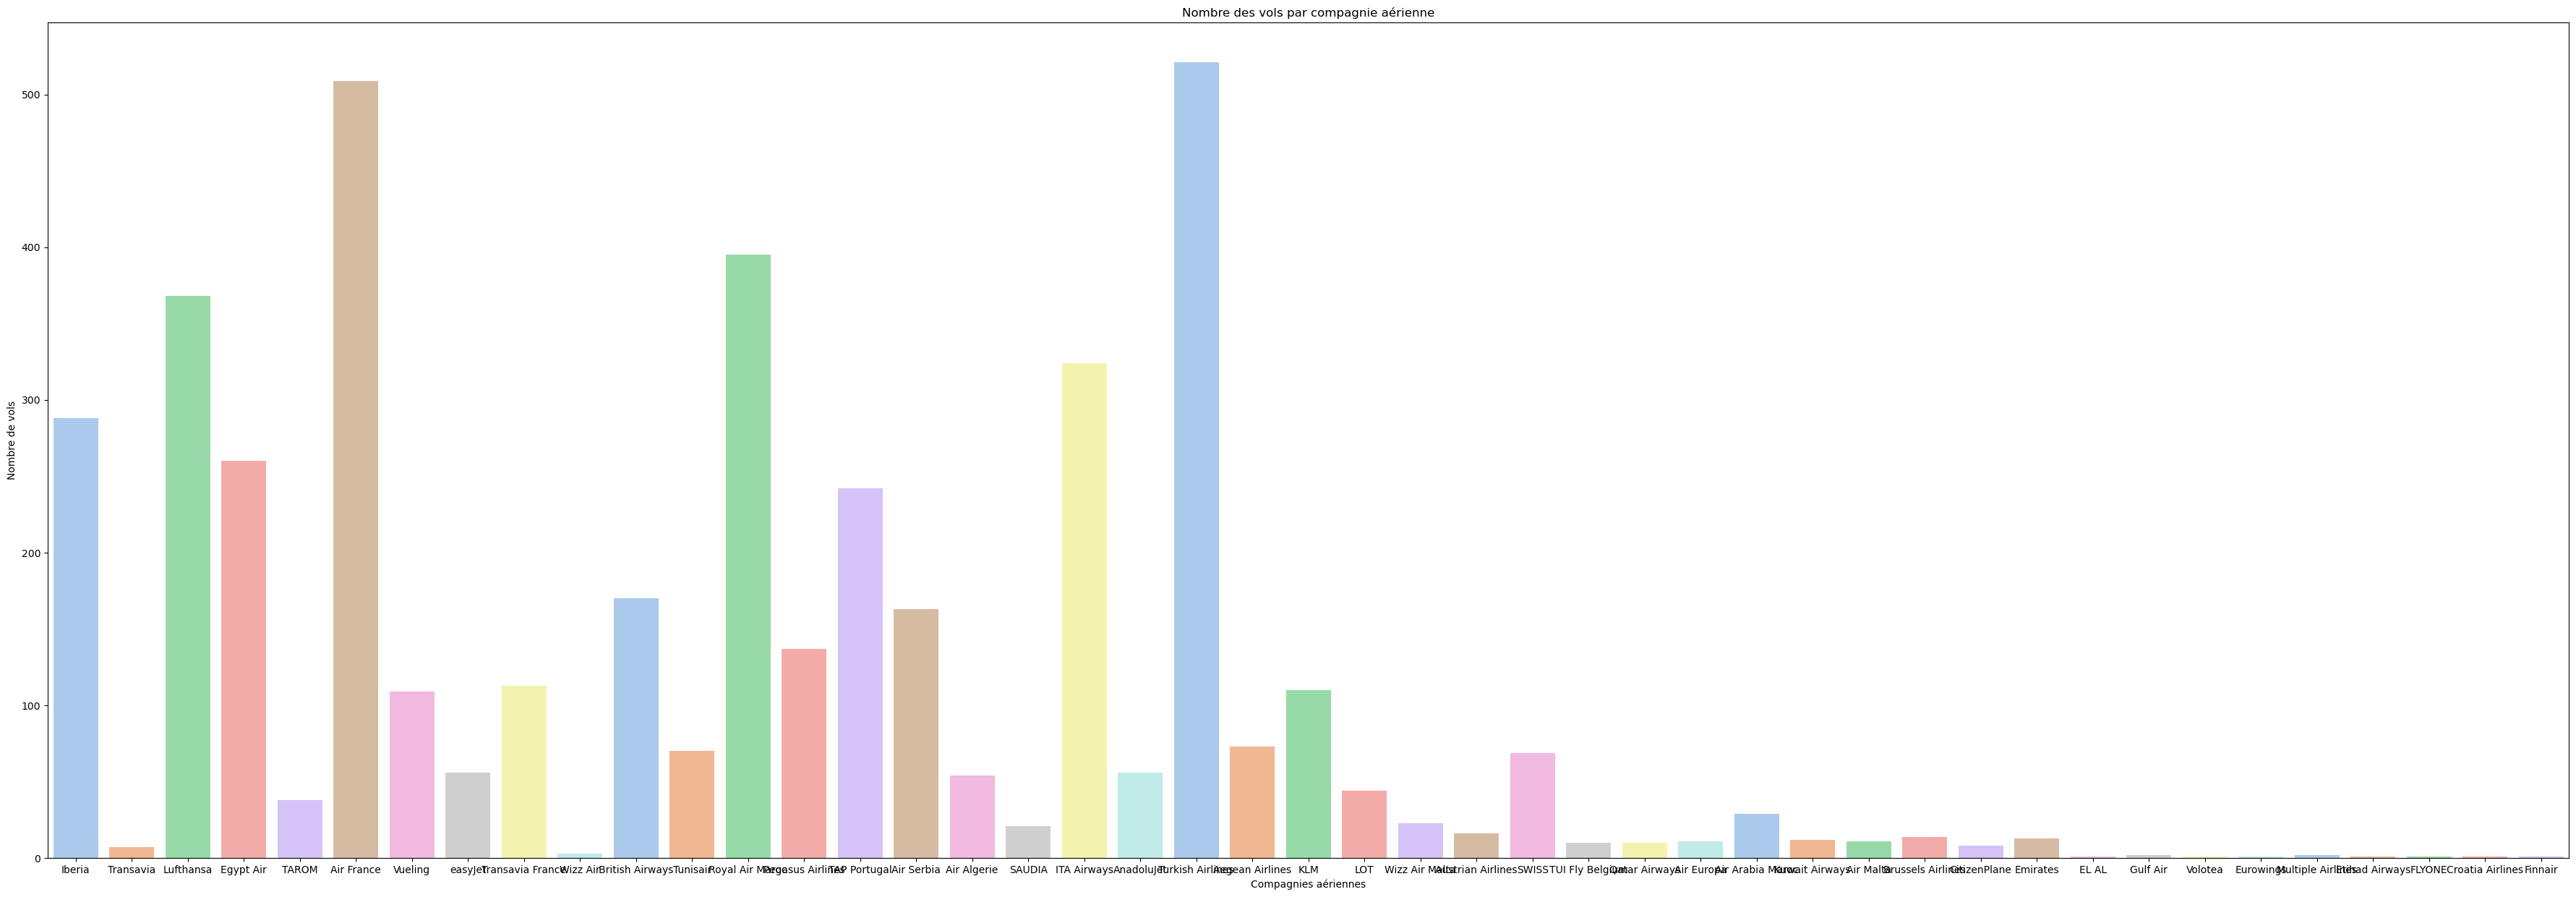

In [17]:
plt.figure(figsize=(45, 15))
sns.countplot(x='Airline', data=data, palette="pastel")
plt.title('Nombre des vols par compagnie aérienne')
plt.xlabel('Compagnies aériennes')
plt.ylabel('Nombre de vols')
plt.show()

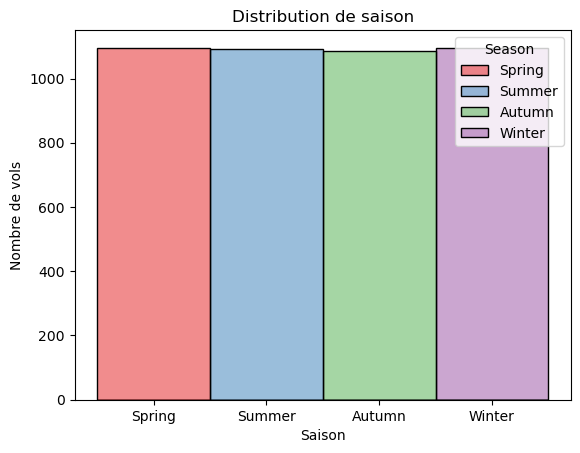

In [19]:
sns.histplot(data=data, x='Season', kde=False, bins=20, hue='Season', palette='Set1')
plt.title('Distribution de la saison')
plt.xlabel('Saison')
plt.ylabel('Nombre de vols')
plt.show()

#### Prix moyen par saison et classe de vols

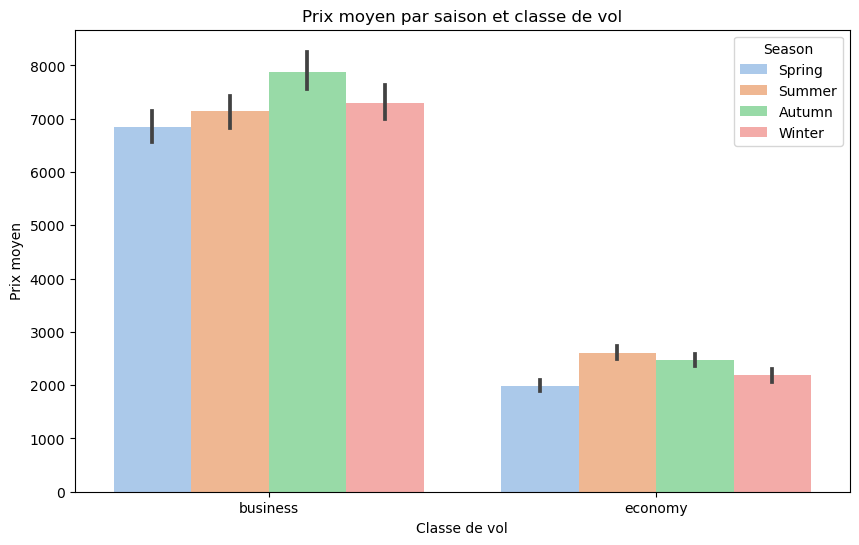

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(x='class', y='Price', hue='Season', data=data,palette="pastel")
plt.title('Prix moyen par saison et classe de vol')
plt.xlabel('Classe de vol')
plt.ylabel('Prix moyen')
plt.show()